In [53]:
# Import libraries
import numpy as np
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [90]:
# Read in raw data files
df_train = pd.read_csv('credit_train.csv')
df_test = pd.read_csv('credit_test.csv')

In [91]:
# Concatenate raw data files into one dataframe
df = pd.concat([df_train, df_test])

/Users/cookiepoon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [92]:
# Remove rows which are completely null from dataframe
df = df[df.isnull().sum(axis=1) < df.shape[1]]

In [93]:
# Replace invalid credit scores (above 850 with an extra 0 entered) with credit score 10X smaller
df['Credit Score'] = np.where(df['Credit Score'] > 850, df['Credit Score']/10, df['Credit Score'])

In [94]:
# Drop rows with contaminated credit score (invalid credit score value)
df = df[df['Credit Score'] <= 850]
df = df.reset_index(drop=True)

In [95]:
# Preview dataframe
df

,Annual Income,Bankruptcies,Credit Score,Current Credit Balance,Current Loan Amount,Customer ID,Home Ownership,Loan ID,Loan Status,Maximum Open Credit,Monthly Debt,Months since last delinquent,Number of Credit Problems,Number of Open Accounts,Purpose,Tax Liens,Term,Years in current job,Years of Credit History
0,1167493.0,1.0,709.0,228190.0,445412.0,981165ec-3274-42f5-a3b4-d104041a9ca9,Home Mortgage,14dd8831-6af5-400b-83ec-68e61888a048,Fully Paid,416746.0,5214.74,NaN,1.0,6.0,Home Improvements,0.0,Short Term,8 years,17.2
1,2231892.0,0.0,741.0,297996.0,99999999.0,5efb2b2b-bf11-4dfd-a572-3761a2694725,Own Home,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,Fully Paid,750090.0,29200.53,29.0,1.0,18.0,Debt Consolidation,0.0,Short Term,8 years,14.9
2,806949.0,0.0,721.0,256329.0,347666.0,e777faab-98ae-45af-9a86-7ce5b33b1011,Own Home,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,Fully Paid,386958.0,8741.90,NaN,0.0,9.0,Debt Consolidation,0.0,Long Term,3 years,12.0
3,896857.0,0.0,729.0,215308.0,206602.0,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Home Mortgage,89d8cb0c-e5c2-4f54-b056-48a645c543dd,Charged Off,272448.0,16367.74,NaN,0.0,6.0,Debt Consolidation,0.0,Short Term,10+ years,17.3
4,1184194.0,1.0,730.0,122170.0,217646.0,90a75dde-34d5-419c-90dc-1e58b04b3e35,Home Mortgage,273581de-85d8-4332-81a5-19b04ce68666,Fully Paid,272052.0,10855.08,10.0,1.0,13.0,Debt Consolidation,0.0,Short Term,< 1 year,19.6
5,2559110.0,0.0,678.0,437171.0,548746.0,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Rent,8af915d9-9e91-44a0-b5a2-564a45c12089,Fully Paid,555038.0,18660.28,33.0,0.0,4.0,Debt Consolidation,0.0,Short Term,2 years,22.6
6,1454735.0,0.0,739.0,669560.0,215952.0,235c4a43-dadf-483d-aa44-9d6d77ae4583,Rent,0b1c4e3d-bd97-45ce-9622-22732fcdc9a0,Fully Paid,1021460.0,39277.75,NaN,0.0,20.0,Debt Consolidation,0.0,Short Term,< 1 year,13.9
7,714628.0,0.0,728.0,203965.0,99999999.0,0de7bcdb-ebf4-4608-ba39-05f083f855b6,Rent,32c2e48f-1ba8-45e0-a530-9a6622c18d9c,Fully Paid,289784.0,11851.06,76.0,0.0,16.0,Debt Consolidation,0.0,Short Term,3 years,16.0
8,776188.0,0.0,740.0,134083.0,99999999.0,11581f68-de3c-49d8-80d9-22268ebb323b,Own Home,403d7235-0284-4bb6-919a-09402fecbf7b,Fully Paid,220220.0,11578.22,25.0,0.0,6.0,Debt Consolidation,0.0,Short Term,< 1 year,8.5
9,1560907.0,1.0,743.0,225549.0,99999999.0,900c9191-2c20-4688-af7e-07c59b5d5a24,Rent,01d878ae-efa2-41e2-8159-6c834ff09f47,Fully Paid,496474.0,17560.37,NaN,1.0,10.0,Debt Consolidation,0.0,Short Term,4 years,13.3


In [96]:
# Preview dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88865 entries, 0 to 88864
Data columns (total 19 columns):
Annual Income                   88865 non-null float64
Bankruptcies                    88684 non-null float64
Credit Score                    88865 non-null float64
Current Credit Balance          88865 non-null float64
Current Loan Amount             88865 non-null float64
Customer ID                     88865 non-null object
Home Ownership                  88865 non-null object
Loan ID                         88865 non-null object
Loan Status                     80846 non-null object
Maximum Open Credit             88864 non-null float64
Monthly Debt                    88865 non-null float64
Months since last delinquent    41930 non-null float64
Number of Credit Problems       88865 non-null float64
Number of Open Accounts         88865 non-null float64
Purpose                         88865 non-null object
Tax Liens                       88858 non-null float64
Term            

In [97]:
# See how many missing values per column
df.isna().sum()/len(df)

Annual Income                   0.000000
Bankruptcies                    0.002037
Credit Score                    0.000000
Current Credit Balance          0.000000
Current Loan Amount             0.000000
Customer ID                     0.000000
Home Ownership                  0.000000
Loan ID                         0.000000
Loan Status                     0.090238
Maximum Open Credit             0.000011
Monthly Debt                    0.000000
Months since last delinquent    0.528161
Number of Credit Problems       0.000000
Number of Open Accounts         0.000000
Purpose                         0.000000
Tax Liens                       0.000079
Term                            0.000000
Years in current job            0.042244
Years of Credit History         0.000000
dtype: float64

In [98]:
#fill in missing values with zero and observe distribution 
df['Months since last delinquent'] = df['Months since last delinquent'].fillna(0)

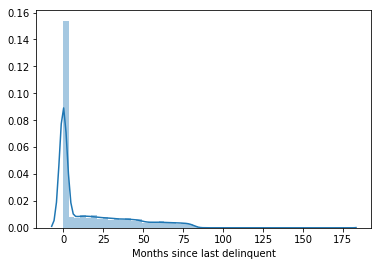

In [99]:
import seaborn as sns
sns.distplot(df['Months since last delinquent'])

In [100]:
#from the plot, we can divdie Months since last delinquent into following categories:
#0: no delinquent, 0~25: 2 years, 25~50: 4 years, 50 ~75: 6 years, >75: over 6 years
df['Delinquent Time'] = 0
df.loc[(df['Months since last delinquent'] == 0), 'Delinquent Time'] = 0
df.loc[(df['Months since last delinquent']>0)&(df['Months since last delinquent']<= 25),'Delinquent Time'] = 2
df.loc[(df['Months since last delinquent']>25)&(df['Months since last delinquent']<= 50),'Delinquent Time'] = 4
df.loc[(df['Months since last delinquent']>50)&(df['Months since last delinquent']<= 75),'Delinquent Time'] = 6
df.loc[(df['Months since last delinquent']>75),'Delinquent Time'] = 6

In [101]:
to_drop = 'Months since last delinquent'
df = df.drop(to_drop, axis = 1)

In [102]:
# Impute missing values for numerical data with the mean except bankruptcies and years in current job 
numeric = df.select_dtypes('number')
numeric.drop(columns = 'Bankruptcies')
numeric_cols = numeric.columns
df[numeric.columns] = numeric.fillna(numeric.mean())

In [105]:
#fill bankruptcies NaN value with 0 
df['Bankruptcies'] = df['Bankruptcies'].fillna(0)

In [103]:
# Impute missing values for categorical data with the mode
categoric = df.select_dtypes('object')
categoric = categoric.drop(columns = 'Years in current job')
df[categoric.columns] = categoric.fillna(categoric.agg(lambda x: x.mode().values[0]))

In [104]:
#fill NaN for Years in current job with'< 1 year'
df['Years in current job'] = df['Years in current job'].fillna('< 1 year')

In [106]:
# Confirm all missing values have been filled in
df.isna().sum()

Annual Income                0
Bankruptcies                 0
Credit Score                 0
Current Credit Balance       0
Current Loan Amount          0
Customer ID                  0
Home Ownership               0
Loan ID                      0
Loan Status                  0
Maximum Open Credit          0
Monthly Debt                 0
Number of Credit Problems    0
Number of Open Accounts      0
Purpose                      0
Tax Liens                    0
Term                         0
Years in current job         0
Years of Credit History      0
Delinquent Time              0
dtype: int64

In [107]:
# Check unique values for each column
df.nunique()

Annual Income                37853
Bankruptcies                     9
Credit Score                   167
Current Credit Balance       30994
Current Loan Amount          21046
Customer ID                  72344
Home Ownership                   4
Loan ID                      72344
Loan Status                      2
Maximum Open Credit          41585
Monthly Debt                 59476
Number of Credit Problems       14
Number of Open Accounts         51
Purpose                         16
Tax Liens                       14
Term                             2
Years in current job            11
Years of Credit History        501
Delinquent Time                  4
dtype: int64

In [108]:
# Check unique values for each categorical column
df[categoric.columns].nunique()

Customer ID       72344
Home Ownership        4
Loan ID           72344
Loan Status           2
Purpose              16
Term                  2
dtype: int64

In [110]:
# Label encode categorical columns
le = LabelEncoder()
df[categoric.columns] = df[categoric.columns].apply(le.fit_transform)
df.head()

,Annual Income,Bankruptcies,Credit Score,Current Credit Balance,Current Loan Amount,Customer ID,Home Ownership,Loan ID,Loan Status,Maximum Open Credit,Monthly Debt,Number of Credit Problems,Number of Open Accounts,Purpose,Tax Liens,Term,Years in current job,Years of Credit History,Delinquent Time
0,1167493.0,1.0,709.0,228190.0,445412.0,43043,1,5898,1,416746.0,5214.74,1.0,6.0,5,0.0,1,8 years,17.2,0
1,2231892.0,0.0,741.0,297996.0,99999999.0,26873,2,22377,1,750090.0,29200.53,1.0,18.0,3,0.0,1,8 years,14.9,4
2,806949.0,0.0,721.0,256329.0,347666.0,65397,2,33793,1,386958.0,8741.90,0.0,9.0,3,0.0,0,3 years,12.0,0
3,896857.0,0.0,729.0,215308.0,206602.0,22612,1,39047,0,272448.0,16367.74,0.0,6.0,3,0.0,1,10+ years,17.3,0
4,1184194.0,1.0,730.0,122170.0,217646.0,40916,1,11116,1,272052.0,10855.08,1.0,13.0,3,0.0,1,< 1 year,19.6,2


In [111]:
# Convert 'Years in current job' to numerical column - 
# Note: Numerical tranformation converts '< 1 year' to 0 and '10+ years' to 10 for simplicity
df['Years in current job'] = df['Years in current job'].replace({'< 1 year':0, '1 year': 1, '2 years': 2,
                                                                 '3 years':3, '4 years':4, '5 years':5, 
                                                                 '6 years':6, '7 years':7, '8 years':8,
                                                                 '9 years': 9, '10+ years': 10})
df.head()

,Annual Income,Bankruptcies,Credit Score,Current Credit Balance,Current Loan Amount,Customer ID,Home Ownership,Loan ID,Loan Status,Maximum Open Credit,Monthly Debt,Number of Credit Problems,Number of Open Accounts,Purpose,Tax Liens,Term,Years in current job,Years of Credit History,Delinquent Time
0,1167493.0,1.0,709.0,228190.0,445412.0,43043,1,5898,1,416746.0,5214.74,1.0,6.0,5,0.0,1,8,17.2,0
1,2231892.0,0.0,741.0,297996.0,99999999.0,26873,2,22377,1,750090.0,29200.53,1.0,18.0,3,0.0,1,8,14.9,4
2,806949.0,0.0,721.0,256329.0,347666.0,65397,2,33793,1,386958.0,8741.90,0.0,9.0,3,0.0,0,3,12.0,0
3,896857.0,0.0,729.0,215308.0,206602.0,22612,1,39047,0,272448.0,16367.74,0.0,6.0,3,0.0,1,10,17.3,0
4,1184194.0,1.0,730.0,122170.0,217646.0,40916,1,11116,1,272052.0,10855.08,1.0,13.0,3,0.0,1,0,19.6,2


In [112]:
# Get more insight into 'Credit Score' column
df['Credit Score'].describe()

count    88865.000000
mean       716.323930
std         28.291419
min        585.000000
25%        703.000000
50%        722.000000
75%        739.000000
max        751.000000
Name: Credit Score, dtype: float64

In [113]:
# Add 'Credit Score Range' column
df['Credit Score Range'] = pd.cut(df['Credit Score'], 10)
df.head()

,Annual Income,Bankruptcies,Credit Score,Current Credit Balance,Current Loan Amount,Customer ID,Home Ownership,Loan ID,Loan Status,Maximum Open Credit,Monthly Debt,Number of Credit Problems,Number of Open Accounts,Purpose,Tax Liens,Term,Years in current job,Years of Credit History,Delinquent Time,Credit Score Range
0,1167493.0,1.0,709.0,228190.0,445412.0,43043,1,5898,1,416746.0,5214.74,1.0,6.0,5,0.0,1,8,17.2,0,"(701.2, 717.8]"
1,2231892.0,0.0,741.0,297996.0,99999999.0,26873,2,22377,1,750090.0,29200.53,1.0,18.0,3,0.0,1,8,14.9,4,"(734.4, 751.0]"
2,806949.0,0.0,721.0,256329.0,347666.0,65397,2,33793,1,386958.0,8741.90,0.0,9.0,3,0.0,0,3,12.0,0,"(717.8, 734.4]"
3,896857.0,0.0,729.0,215308.0,206602.0,22612,1,39047,0,272448.0,16367.74,0.0,6.0,3,0.0,1,10,17.3,0,"(717.8, 734.4]"
4,1184194.0,1.0,730.0,122170.0,217646.0,40916,1,11116,1,272052.0,10855.08,1.0,13.0,3,0.0,1,0,19.6,2,"(717.8, 734.4]"


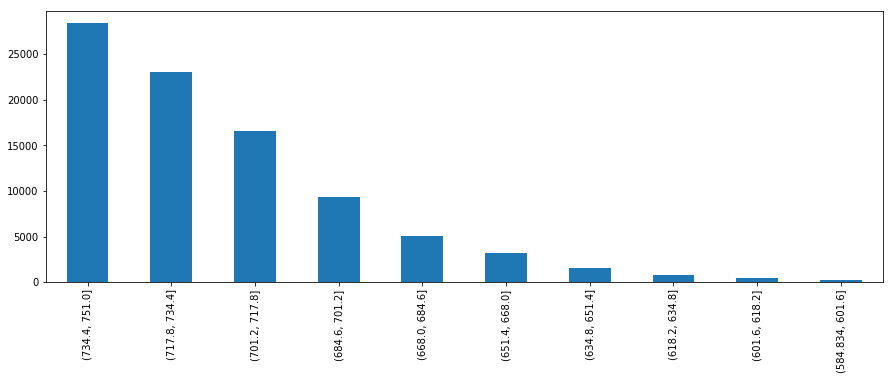

In [114]:
from collections import Counter
counter = Counter(df['Credit Score Range'])
for k,v in counter.items():
    per = v / len(df['Credit Score Range']) * 100
    print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
df['Credit Score Range'].value_counts().plot(kind='bar',figsize=(15,5))

In [116]:
# Normalize continuous columns
numeric = df.select_dtypes('number')
transformer = preprocessing.MinMaxScaler()
numeric_normalized = transformer.fit_transform(numeric.values)
df[numeric.columns] = numeric_normalized

In [117]:
# View final dataframe after processing
df

,Annual Income,Bankruptcies,Credit Score,Current Credit Balance,Current Loan Amount,Customer ID,Home Ownership,Loan ID,Loan Status,Maximum Open Credit,Monthly Debt,Number of Credit Problems,Number of Open Accounts,Purpose,Tax Liens,Term,Years in current job,Years of Credit History,Delinquent Time,Credit Score Range
0,0.006592,0.142857,0.746988,0.006940,0.004342,0.594985,0.333333,0.081528,1.0,0.000271,0.011965,0.066667,0.066667,0.333333,0.000000,1.0,0.8,0.202096,0.000000,"(701.2, 717.8]"
1,0.013024,0.000000,0.939759,0.009063,1.000000,0.371466,0.666667,0.309318,1.0,0.000487,0.066998,0.066667,0.226667,0.200000,0.000000,1.0,0.8,0.167665,0.666667,"(734.4, 751.0]"
2,0.004413,0.000000,0.819277,0.007796,0.003365,0.903985,0.666667,0.467122,1.0,0.000251,0.020057,0.000000,0.106667,0.200000,0.000000,0.0,0.3,0.124251,0.000000,"(717.8, 734.4]"
3,0.004957,0.000000,0.867470,0.006549,0.001954,0.312567,0.333333,0.539748,0.0,0.000177,0.037554,0.000000,0.066667,0.200000,0.000000,1.0,1.0,0.203593,0.000000,"(717.8, 734.4]"
4,0.006693,0.142857,0.873494,0.003716,0.002064,0.565583,0.333333,0.153657,1.0,0.000177,0.024906,0.066667,0.160000,0.200000,0.000000,1.0,0.0,0.238024,0.333333,"(717.8, 734.4]"
5,0.015002,0.000000,0.560241,0.013296,0.005376,0.686563,1.000000,0.544144,1.0,0.000360,0.042814,0.000000,0.040000,0.200000,0.000000,1.0,0.2,0.282934,0.666667,"(668.0, 684.6]"
6,0.008328,0.000000,0.927711,0.020364,0.002047,0.138742,1.000000,0.042962,1.0,0.000663,0.090119,0.000000,0.253333,0.200000,0.000000,1.0,0.0,0.152695,0.000000,"(734.4, 751.0]"
7,0.003855,0.000000,0.861446,0.006204,1.000000,0.053855,1.000000,0.198139,1.0,0.000188,0.027191,0.000000,0.200000,0.200000,0.000000,1.0,0.3,0.184132,1.000000,"(717.8, 734.4]"
8,0.004227,0.000000,0.933735,0.004078,1.000000,0.067429,0.666667,0.251344,1.0,0.000143,0.026565,0.000000,0.066667,0.200000,0.000000,1.0,0.0,0.071856,0.333333,"(734.4, 751.0]"
9,0.008970,0.142857,0.951807,0.006860,1.000000,0.562819,1.000000,0.006981,1.0,0.000322,0.040291,0.066667,0.120000,0.200000,0.000000,1.0,0.4,0.143713,0.000000,"(734.4, 751.0]"


In [23]:
# Write processed dataframe to csv file called 'credit.csv'
df.to_csv('./datasets/credit.csv', index=False)